In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn import tree

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [0]:
clf =tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf.fit(X, y)
clf.score(X, y)

0.99

**2.4.3** Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

In [0]:
petal_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv",  index_col=0)
iris_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv',  index_col=0)

In [0]:
X_train = petal_data.drop(['species'], axis=1)
y_train = petal_data.species
X_test = iris_data.drop(['species'], axis=1)
y_test = iris_data.species

In [0]:
rs = np.random.seed(0) 
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
  clf =tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)
  
  temp_score_data = pd.DataFrame({'max_depth': [max_depth],'train_score': [train_score], 'test_score': [test_score]})
  scores_data = scores_data.append(temp_score_data, sort=True)

In [0]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'], var_name='set_type', value_name = 'score' )
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


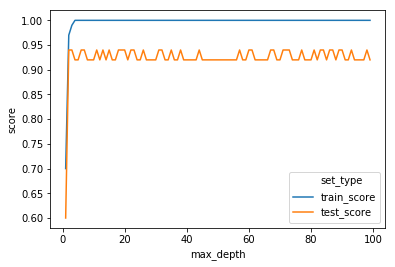

In [0]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

**2.4.4** Скачайте тренировочный датасэт и  обучите на нём Decision Tree. После этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся. Введите число собачек в вашем датасэте.

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
train_data = pd.read_csv("https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv")
train_data.head(3)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка


In [0]:
train_data.groupby('Вид').count()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
Вид,,,,,
котик,500,500,500,500,500
собачка,500,500,500,500,500


In [0]:

X = train_data.drop('Вид', axis=1)
y = train_data.Вид
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42)


rs = np.random.seed(0) 
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
  clf =tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)
  mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
  
  temp_score_data = pd.DataFrame({'max_depth': [max_depth],'train_score': [train_score], 'test_score': [test_score], 'cross_val_score': [mean_cross_val_score]})
  scores_data = scores_data.append(temp_score_data, sort=True)

In [0]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], var_name='set_type', value_name = 'score' )
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,1.0
1,2,train_score,1.0
2,3,train_score,1.0
3,4,train_score,1.0
4,5,train_score,1.0


In [0]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [0]:
df_test = pd.read_json('/content/dataset_209691_15.txt')

neworder = ['Длина', 'Высота', 'Шерстист', 'Гавкает', 'Лазает по деревьям']
df_test_new = df_test.reindex(columns = neworder)
df_test_new.head()

In [0]:
predictions = clf.predict(df_test_new)
l = list(predictions)
l.count('собачка')

41

**2.5** Исходно в датасэтах содержались тексты песен, но Decision Tree работает с категориальными и числовыми переменными, а текст это... текст. Поэтому его необходимо преобразовать в понятную для модели форму. В данном случае для каждой песни просто посчитаны длина и количество некоторых знаков пунктуации.

Обучите модель на тренировочных данных, предскажите авторов для тестовых и поместите в переменную predictions. Затем посчитайте precision score на предсказаниях и y_test, укажите параметр average='micro', и сохраните результат в переменную precision.

In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [0]:
df_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')
X = df_test.drop('artist', axis=1)
y = df_test.artist
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42)
X1, X2, y1, y2 = train_test_split(X_train, y_train, test_size = 0.5, random_state=42)
df_test.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [0]:
clf = tree.DecisionTreeClassifier()
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 150)}
grid_search_cv_clf = GridSearchCV(clf, parametrs,cv=10)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

best_clf = grid_search_cv_clf.best_estimator_
predictions = best_clf.predict(X_test)
precision = precision_score(y_test, predictions, average='micro')

In [0]:
# пробная версия
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X1, X2, y1, y2 = train_test_split(X_train, y_train, test_size = 0.5, random_state=42)

rs = np.random.seed(0) 
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
  clf.fit(X1, y1)
  train_score = clf.score(X1, y1)
  test_score = clf.score(X2, y2)
  mean_cross_val_score = cross_val_score(clf, X1, y1, cv=5).mean()
  
  temp_score_data = pd.DataFrame({'max_depth': [max_depth],'train_score': [train_score], 'test_score': [test_score], 'cross_val_score': [mean_cross_val_score]})
  scores_data = scores_data.append(temp_score_data)

scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], var_name='set_type', value_name = 'score' )

predictions = clf.predict(X_test)
precision = precision_score(y_test, predictions, average='micro') 